In [5]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

import matplotlib.pyplot as plt

np.random.seed(1671) # for reproducibility
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10
OPTIMIZER = SGD()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3 

# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

RESHAPED = 784

X_train = X_train.reshape(60000,RESHAPED)
X_test = X_test.reshape(10000,RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)
print(y_test[:100])

model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss = 'categorical_crossentropy', 
             optimizer = OPTIMIZER, 
             metrics = ['accuracy'])
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = NB_EPOCH, verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
score = model.evaluate(X_test,Y_test, verbose = VERBOSE)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])





60000 train samples
10000 test samples
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_11 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_12 (Activation)   (None, 128)               0         
_______________________________

{'val_loss': [0.92929824034372965, 0.54003837299346924, 0.42978704500198367, 0.37896242332458496, 0.34555926267306009, 0.32317352422078449, 0.30478882805506391, 0.28959518917401633, 0.27760776321093239, 0.26568941775957744, 0.25515976031621296, 0.24653920555114747, 0.23879783781369526, 0.23195711143811543, 0.22609368856747944, 0.21803140711784363, 0.21215212595462798, 0.20755096729596456, 0.20182094260056813, 0.19738976977268854], 'val_acc': [0.81241666666666668, 0.86524999999999996, 0.88833333349227905, 0.8976666669845581, 0.90391666698455808, 0.91066666666666662, 0.91275000047683719, 0.91716666682561243, 0.91983333349227903, 0.92341666682561241, 0.92575000031789145, 0.92841666666666667, 0.92983333349227903, 0.93216666698455808, 0.93391666698455811, 0.93508333365122476, 0.93783333365122479, 0.93875000031789146, 0.94091666666666662, 0.94200000031789144], 'loss': [1.7403786815007527, 0.92316596317291255, 0.69352952424685166, 0.5947235450744629, 0.5347088378270467, 0.49762851953506471, 0

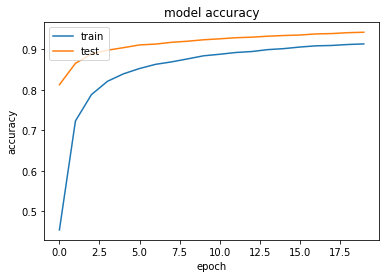

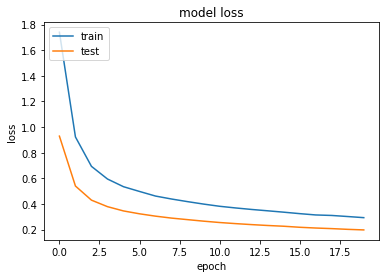

In [10]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'],loc = 'upper left')
plt.show()







